# Abstract - Determine which attributes will indicate inedible mushroom.

# Introduction - Mushrooms have been a cornerstone of my culinary experience. A professor once emphasized avoiding black gill mushrooms but purple are ok. I thought this project would provide an opportunity to either support his claim or offer a more reliable indicator. 

##  + Is gill color a reliable indicator of poisionous mushrooms

## + Is another mushroom attribute a better indicator of consumability

## + Train a classification model on mushroom dataset

## EDA

In [2]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
col_Names=['class','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape' ,'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = pd.read_table(url , sep=",", names=col_Names)

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Feature Engineering

In [7]:
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
le = LabelEncoder()
for col in data_encoded.columns:
    data_encoded[col] = le.fit_transform(data_encoded[col]) 
    
data_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
data_encoded.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [9]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Modeling

In [10]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [11]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)


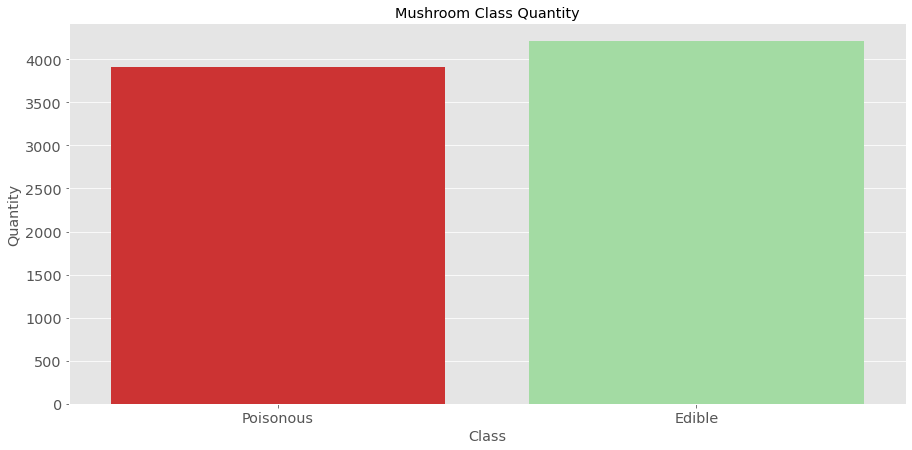

In [12]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

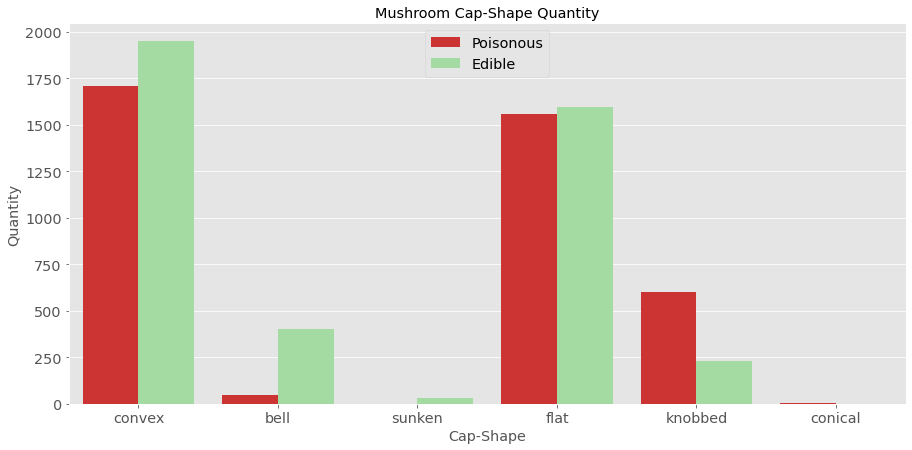

In [13]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

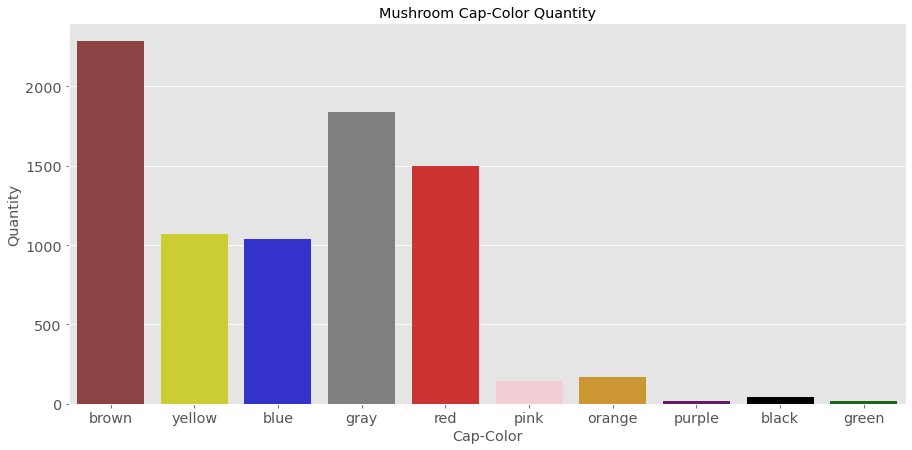

In [14]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

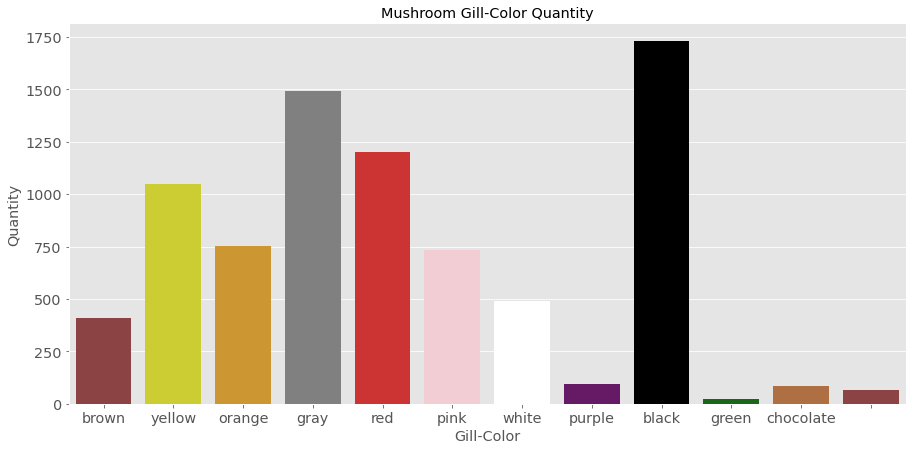

In [15]:
color_dict = {"brown":"n","yellow":"y", "orange":"o", "gray":"g", "red":"e","pink":"p",
              "white":"w", "purple":"u", "black":"k", "green":"r", "chocolate":"h"}
plot_col(col='gill-color', color=color_dict.keys(), labels=color_dict)

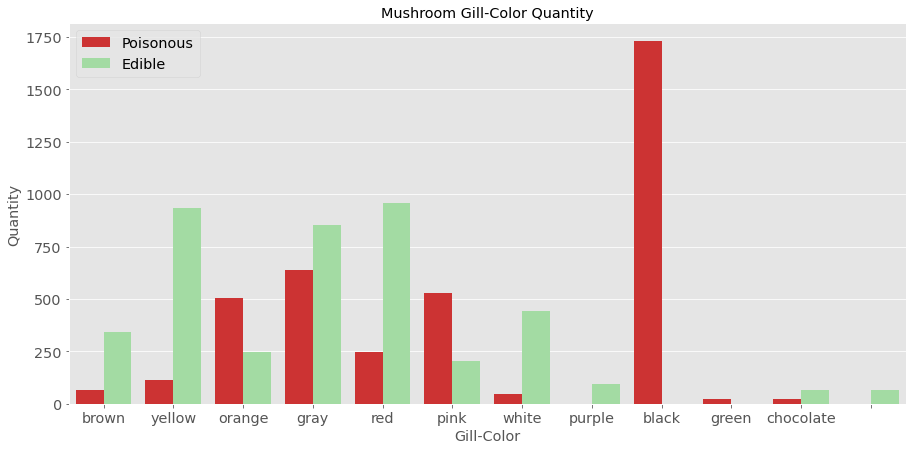

In [16]:
plot_col(col='gill-color', hue='class', labels=color_dict)

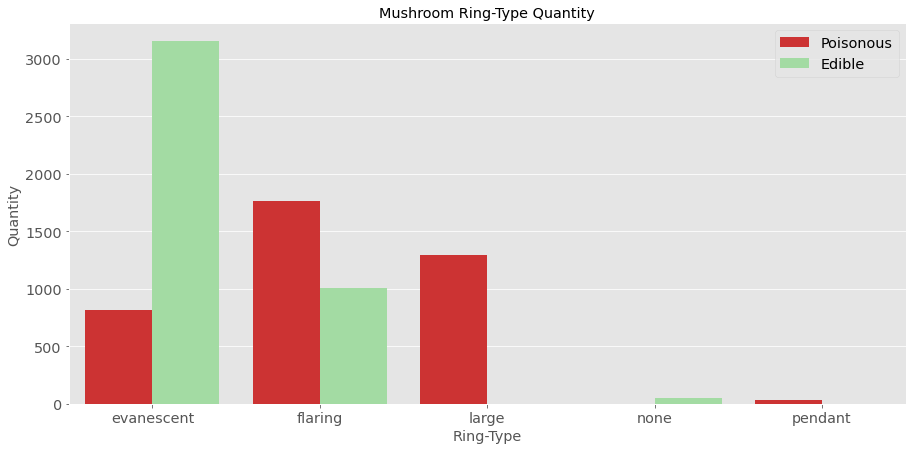

In [21]:
ring_type_dict = {"evanescent":"e", "flaring":"f", "large":"l", "none":"n", "pendant":"p"}
plot_col(col='ring-type', hue='class', labels=ring_type_dict)

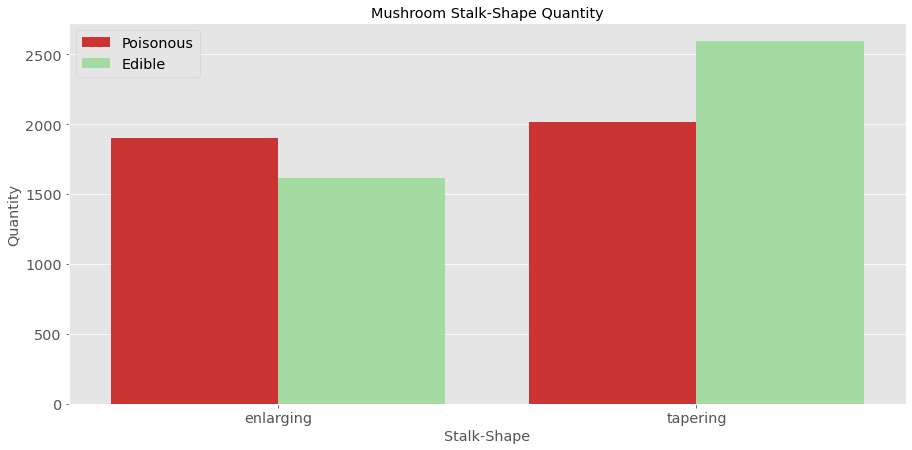

In [20]:
stalk_shape_dict = {"enlarging":"e","tapering":"t"}
plot_col(col='stalk-shape', hue='class', labels=stalk_shape_dict)

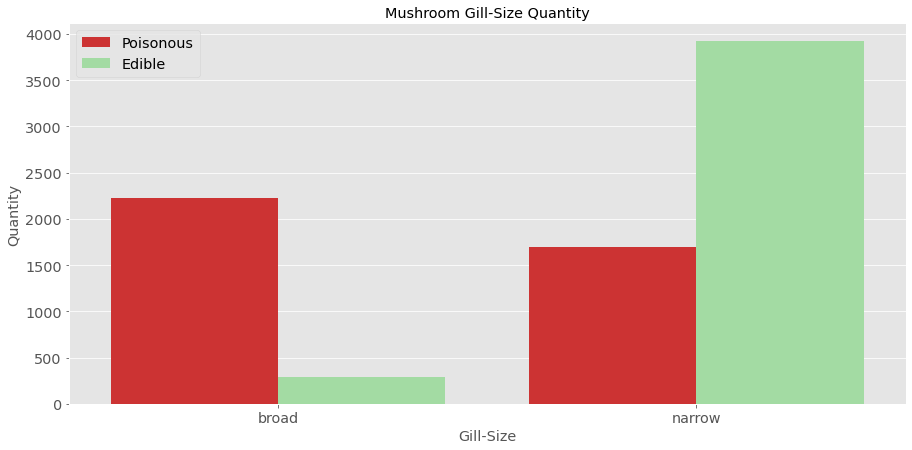

In [23]:
gill_size_dict = {"broad":"b", "narrow":"n"}
plot_col(col='gill-size', hue='class', labels=gill_size_dict)

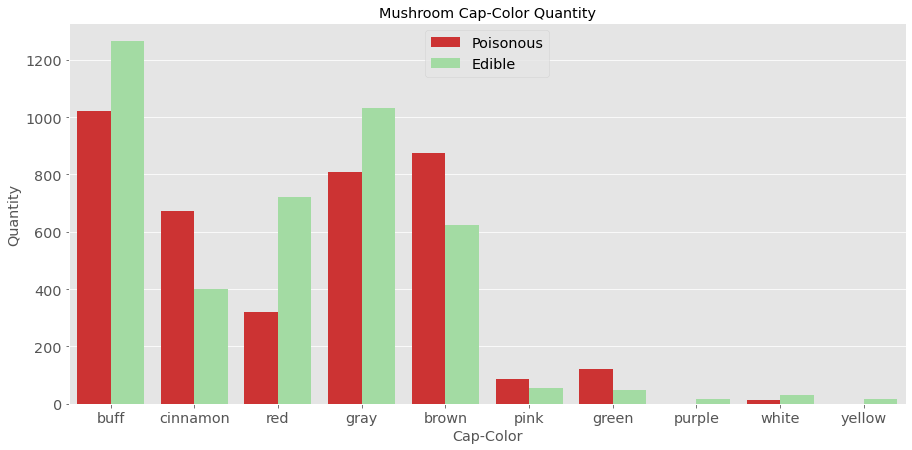

In [24]:
cap_color_dict = {"buff":"b", "cinnamon":"c", "red":"e", "gray":"g","brown":"n","pink":"p","green":"r","purple":"u","white":"w","yellow":"y",}
plot_col(col='cap-color', hue='class', labels=cap_color_dict)

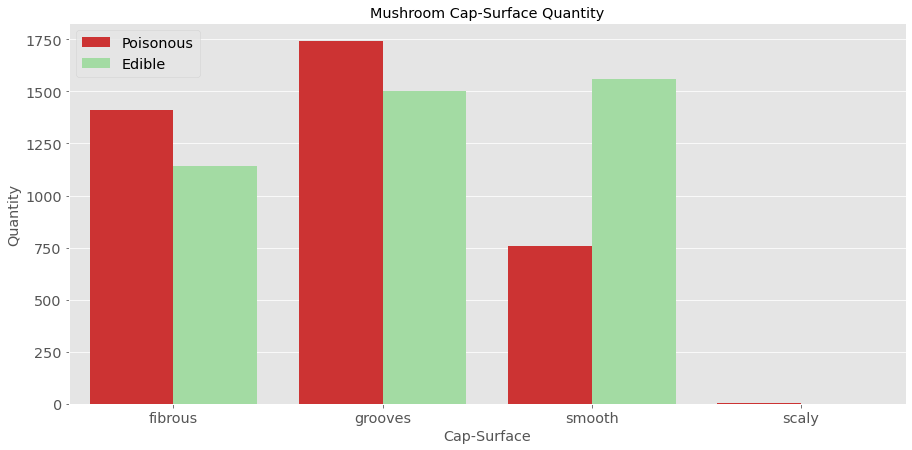

In [25]:
cap_surface_dict = {"fibrous":"f","grooves":"g","smooth":"s","scaly":"y"}
plot_col(col='cap-surface', hue='class', labels=cap_surface_dict)

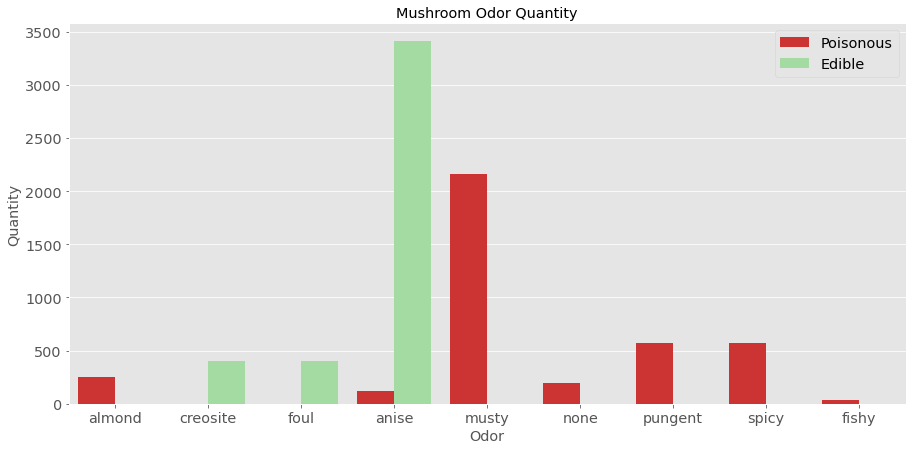

In [26]:
odor_dict = {"almond":"a","creosite":"c","foul":"f","anise":"1","musty":"m","none":"n","pungent":"p","spicy":"s","fishy":"y"}
plot_col(col='odor', hue='class', labels=odor_dict)

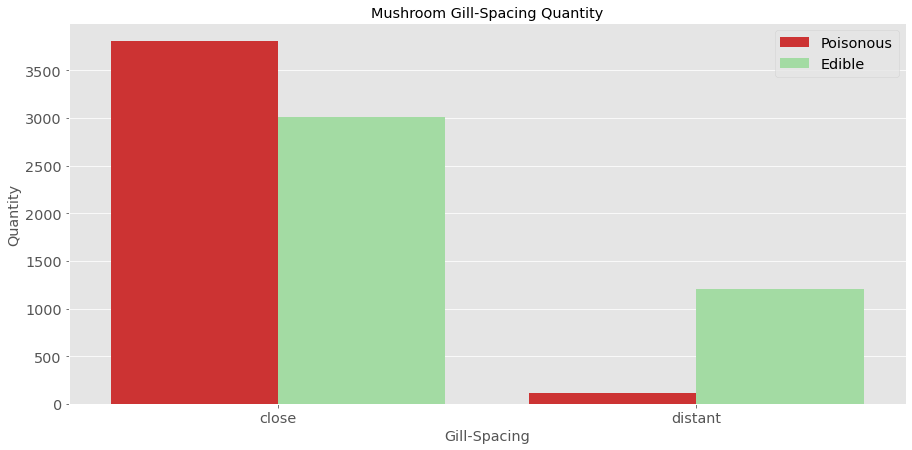

In [27]:
gill_spacing_dict = {"close":"c","distant":"d","crowded":"w"}
plot_col(col='gill-spacing', hue='class', labels=gill_spacing_dict)

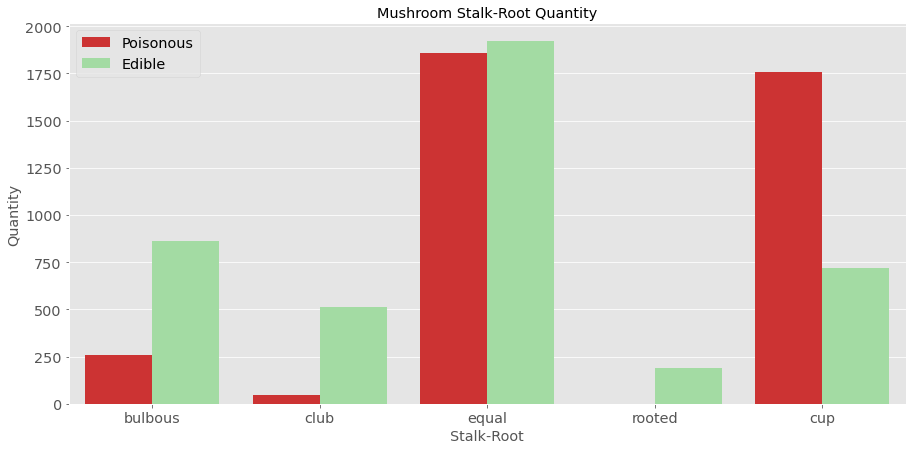

In [28]:
stalk_root_dict = {"bulbous":"b","club":"c","equal":"e","rooted":"r","cup":"u","rhizomorphs":"z"}
plot_col(col='stalk-root', hue='class', labels=stalk_root_dict)

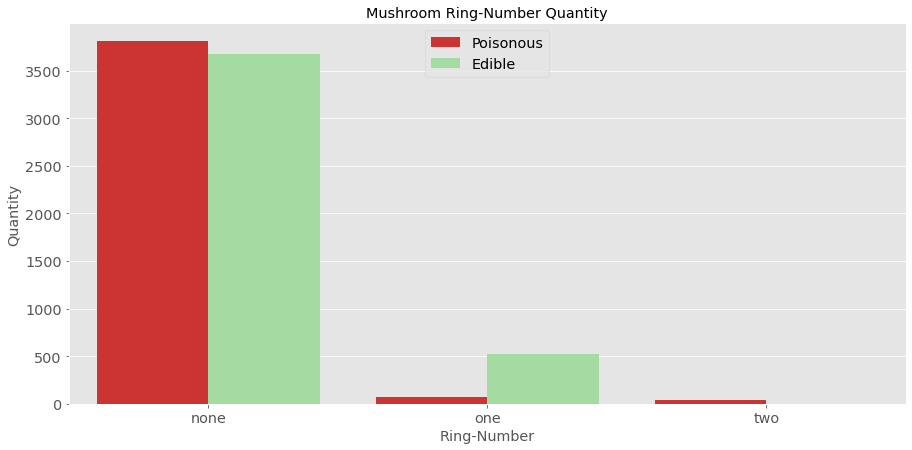

In [29]:
ring_number_dict = {"none":"n","one":"o","two":"t"}
plot_col(col='ring-number', hue='class', labels=ring_number_dict)

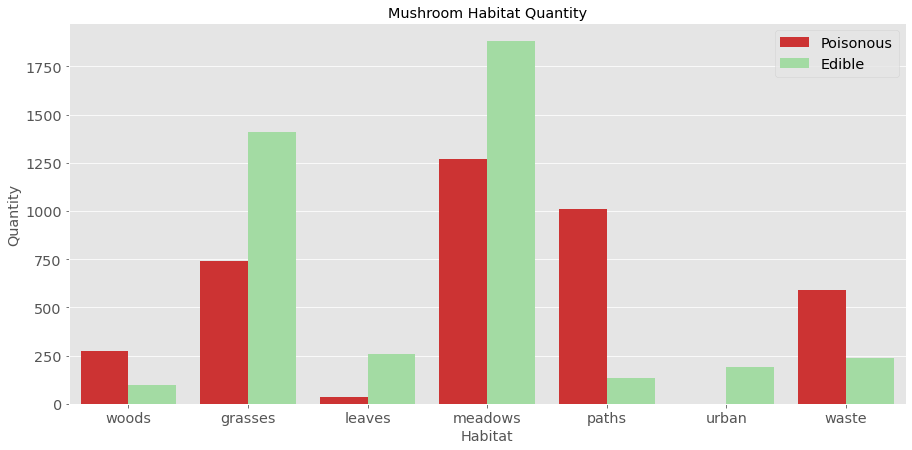

In [30]:
habitat_dict = {"woods":"d","grasses":"g","leaves":"l","meadows":"m","paths":"p","urban":"u","waste":"w"}
plot_col(col='habitat', hue='class', labels=habitat_dict)

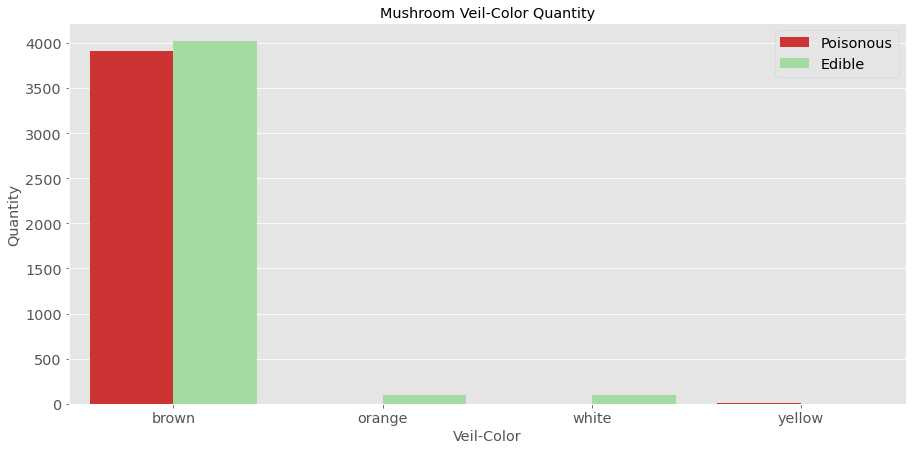

In [31]:
veil_color_dict = {"brown":"n","orange":"o","white":"w","yellow":"y"}
plot_col(col='veil-color', hue='class', labels=veil_color_dict)

## Results & Discussion

### The gill color chart clearly supports the professor's claim about black gilled mushrooms. Additionally, odor attribute provided indicators of inediblity. I also thought cap color would be a better indicator.  Lastly, the habitiat data was interesting. I would have thought more specimens in the woods would have been edible.

## Conclusion & Summary

### Avoid black gilled, off-smelling mushrooms if you see them.  This project was interesting and I will take what I have learned the next time I go mushroom foraging. 

## Limitations & Later Work

### I am new user of scikit learn. My lack of knowledge on the classification forced me to do work that was on my level of understand.  I want to develop better understanding of the tool to develop better insights for this dataset.

## References & Contribution

### Origin: Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf Donor: Jeff Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)